# Apple Stock:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/AI&ML Engineer/Projects/Apple/Apple Stock/AirPassengers.csv")

In [3]:
df.head()

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


In [4]:
df.tail()

,Month,Passengers
139,15-08-1960,606
140,15-09-1960,508
141,15-10-1960,461
142,15-11-1960,390
143,15-12-1960,432


In [5]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [7]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [12]:
df=df.set_index('Month')
df.head()

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


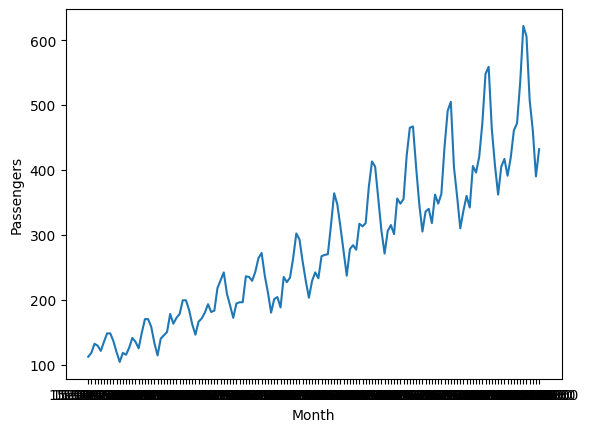

In [13]:
sns.lineplot(x=df.index,y=df['Passengers'])
plt.show()

# Chesk Stationarity:-

## Model-1:- Rolling Statistic

In [14]:
df['Passengers'].rolling(window=2).mean()

Month
15-01-1949      NaN
15-02-1949    115.0
15-03-1949    125.0
15-04-1949    130.5
15-05-1949    125.0
              ...  
15-08-1960    614.0
15-09-1960    557.0
15-10-1960    484.5
15-11-1960    425.5
15-12-1960    411.0
Name: Passengers, Length: 144, dtype: float64

In [15]:
df['Passengers'].rolling(window=2).std()

Month
15-01-1949          NaN
15-02-1949     4.242641
15-03-1949     9.899495
15-04-1949     2.121320
15-05-1949     5.656854
                ...    
15-08-1960    11.313708
15-09-1960    69.296465
15-10-1960    33.234019
15-11-1960    50.204581
15-12-1960    29.698485
Name: Passengers, Length: 144, dtype: float64

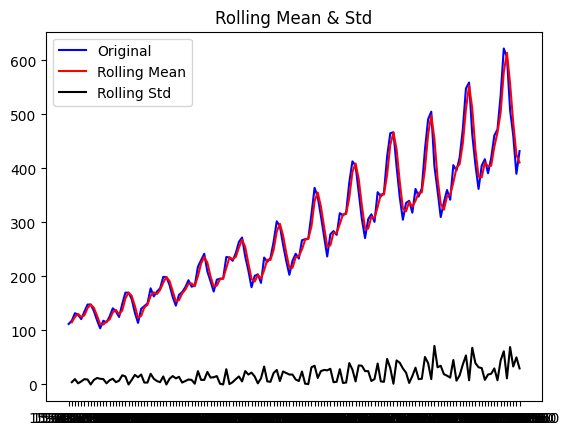

In [17]:
role_mean=df['Passengers'].rolling(window=2).mean()
role_std=df['Passengers'].rolling(window=2).std()

orig=plt.plot(df['Passengers'],color='blue',label="Original")
r_mean=plt.plot(role_mean,color='red',label='Rolling Mean')
r_std=plt.plot(role_std,color='black',label='Rolling Std')
plt.xticks(ticks=df.index)
plt.title('Rolling Mean & Std')
plt.legend()
plt.show()

# Augmented Dicky Fuller Test:-

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adfuller_result=adfuller(df['Passengers'])
adfuller_result

(0.8153688792060352,
 0.9918802434376408,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [20]:
print("P-value :",adfuller_result[1])

P-value : 0.9918802434376408


## Differencing:-

In [23]:
diff=df['Passengers']-df['Passengers'].shift(2)
diff.dropna(inplace=True)
diff

Month
15-03-1949     20.0
15-04-1949     11.0
15-05-1949    -11.0
15-06-1949      6.0
15-07-1949     27.0
              ...  
15-08-1960     71.0
15-09-1960   -114.0
15-10-1960   -145.0
15-11-1960   -118.0
15-12-1960    -29.0
Name: Passengers, Length: 142, dtype: float64

In [24]:
adfuller_result=adfuller(diff)
adfuller_result

(-2.9616951355554404,
 0.0386297576769867,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414162)

In [25]:
print("P-value :",adfuller_result[1])

P-value : 0.0386297576769867


In [35]:
y_train=diff[:114]
y_test=diff[114:]

In [36]:
y_train

Month
15-03-1949     20.0
15-04-1949     11.0
15-05-1949    -11.0
15-06-1949      6.0
15-07-1949     27.0
              ...  
15-04-1958     30.0
15-05-1958      1.0
15-06-1958     87.0
15-07-1958    128.0
15-08-1958     70.0
Name: Passengers, Length: 114, dtype: float64

In [37]:
y_test

Month
15-09-1958    -87.0
15-10-1958   -146.0
15-11-1958    -94.0
15-12-1958    -22.0
15-01-1959     50.0
15-02-1959      5.0
15-03-1959     46.0
15-04-1959     54.0
15-05-1959     14.0
15-06-1959     76.0
15-07-1959    128.0
15-08-1959     87.0
15-09-1959    -85.0
15-10-1959   -152.0
15-11-1959   -101.0
15-12-1959     -2.0
15-01-1960     55.0
15-02-1960    -14.0
15-03-1960      2.0
15-04-1960     70.0
15-05-1960     53.0
15-06-1960     74.0
15-07-1960    150.0
15-08-1960     71.0
15-09-1960   -114.0
15-10-1960   -145.0
15-11-1960   -118.0
15-12-1960    -29.0
Name: Passengers, dtype: float64

# Check ACF & PACF:-

In [38]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm

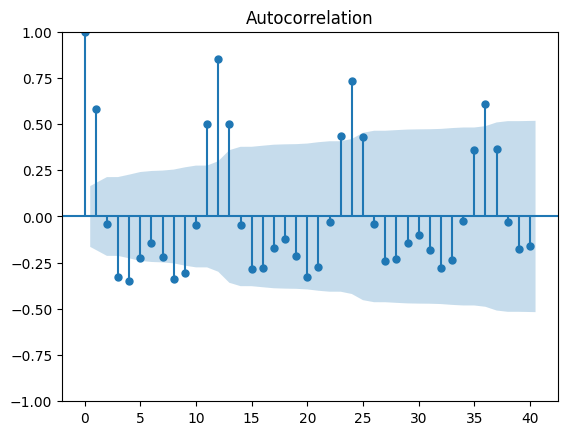

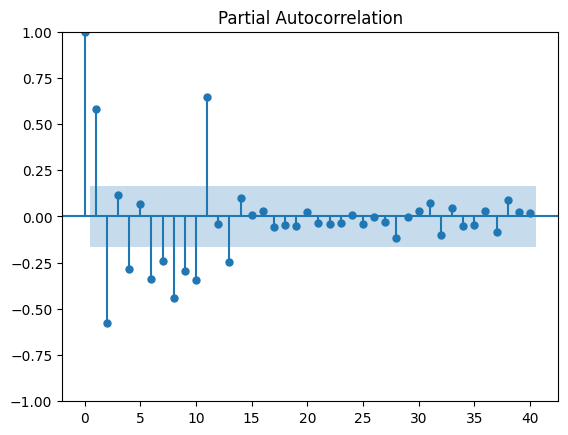

In [39]:
fig=sm.graphics.tsa.plot_acf(diff,lags=40)
fig=sm.graphics.tsa.plot_pacf(diff,lags=40)

In [40]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [41]:
arima_model=ARIMA(diff,order=(11,0,12))
arima=arima_model.fit()
y_pre_test=arima.predict(start=y_test.index[0],end=y_test.index[-1])
y_pre_train=arima.predict(start=y_train.index[0],end=y_train.index[-1])
from sklearn.metrics import r2_score
print('Test R2 value :',r2_score(y_pre_test,y_test))
print('Train R2 value :',r2_score(y_pre_train,y_train))

Test R2 value : 0.9658014538552823
Train R2 value : 0.9381774545067887
